### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq ,irfft

C:\Users\chaya\AppData\Local\Temp/ipykernel_11072/1138730821.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq, y = wavfile.read('images/twinkle.wav') #get the file


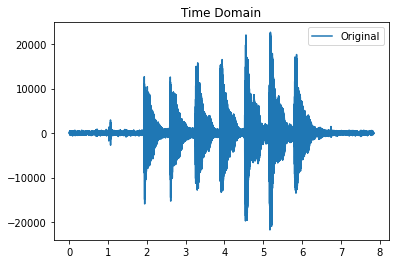

In [151]:
freq, y = wavfile.read('images/twinkle.wav') #get the file
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

([<matplotlib.lines.Line2D at 0x22d08a2b850>],
 array([0.30525312, 0.3036233 , 0.13123419, ..., 0.00324686, 0.01581014,
        0.00600997]))

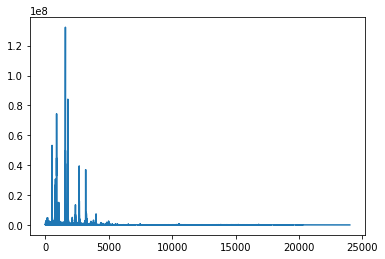

In [152]:
fourier = rfft(y) #fourier transform the sound
f = rfftfreq(len(y),dt)
plt.plot(f, abs(fourier), label='fft'),abs(fourier)/len(y)

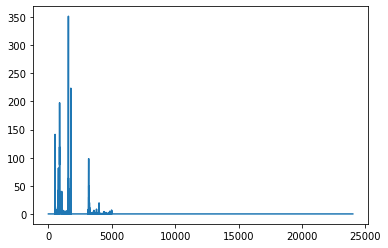

In [155]:
mask1 = np.where(np.logical_and(f>3100, f<5000),1,0) #band filter1
mask2 = np.where(np.logical_and(f>500, f<900),1,0) #band filter2
mask3 = np.where(np.logical_and(f>1000, f<1800),1,0) #band filter3
mask = mask1 + mask2 +mask3 
masked = mask* fourier #convolute mask to sound
plt.plot(f, abs(masked)/len(y), label='fft')

In [156]:
new_f_clean = irfft(masked)
wavfile.write('NoiseReducedTwinkle.wav', freq, np.array(new_f_clean, dtype=np.int16))